Nama  : Aditya Rizki Widyanto <br>
SCID  : AI05102 <br>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)

# Gunakan groupby dan agg untuk menghitung statistik
hasil = data.groupby(['MaritalDesc', 'Sex'])['Salary'].agg(['min', 'median', 'max', 'mean']).reset_index()
hasil = hasil.rename(columns={'min': 'min_Salary', 'median': 'median_Salary', 'max': 'max_Salary', 'mean': 'average_Salary'})

# print(hasil)
hasil

,MaritalDesc,Sex,min_Salary,median_Salary,max_Salary,average_Salary
0,Divorced,F,45069,59393.0,68182,57345.500000
1,Divorced,M,45115,63738.5,148999,72520.857143
2,Married,F,45433,62662.0,250000,69638.986111
3,Married,M,46120,63370.5,157000,70089.038462
4,Separated,F,52984,60627.0,66149,60658.888889
5,Separated,M,64397,70468.0,74417,69760.666667
6,Single,F,45395,62068.0,220450,68988.266667
7,Single,M,46428,63055.5,178000,71340.048387
8,Widowed,F,45046,63303.5,107226,69719.750000
9,Widowed,M,52788,61359.0,67176,60670.500000


2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here
termreason = data['TermReason'].value_counts()
termreason.head()

N/A-StillEmployed    207
Another position      20
unhappy               14
more money            11
career change          9
Name: TermReason, dtype: int64

3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# Filter data hanya untuk karyawan yang 'Exceeds' Skor Kinerja
filter = data[data['PerformanceScore'] == 'Exceeds']

# Hitung total recruit per Sumber Rekrutmen
total = filter['RecruitmentSource'].value_counts().reset_index()

# Ubah nama kolom agar lebih jelas
total.columns = ['RecruitmentSource', 'total_recruit']

# Urutkan hasil berdasarkan total recruit dalam urutan menurun
hasilurut = total.sort_values(by='total_recruit', ascending=False)
hasilurut

,RecruitmentSource,total_recruit
0,Indeed,12
1,LinkedIn,9
2,Diversity Job Fair,6
3,Employee Referral,5
4,CareerBuilder,2
5,Google Search,2
6,Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here

# Kelompokkan data berdasarkan 'Department' dan hitung jumlah manajer (kolom 'Manager Name' yang unik)
jumlah_manajer = data.groupby('Department')['ManagerName'].nunique().reset_index()
jumlah_manajer

,Department,ManagerName
0,Admin Offices,3
1,Executive Office,1
2,IT/IS,6
3,Production,10
4,Sales,4
5,Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here

# kelompokkan data berdasarkan kolom 'Sex' (jenis kelamin) dan hitung nilai terkait dalam kolom 'Termd'
data.groupby('Sex')['Termd'].value_counts(normalize=True)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

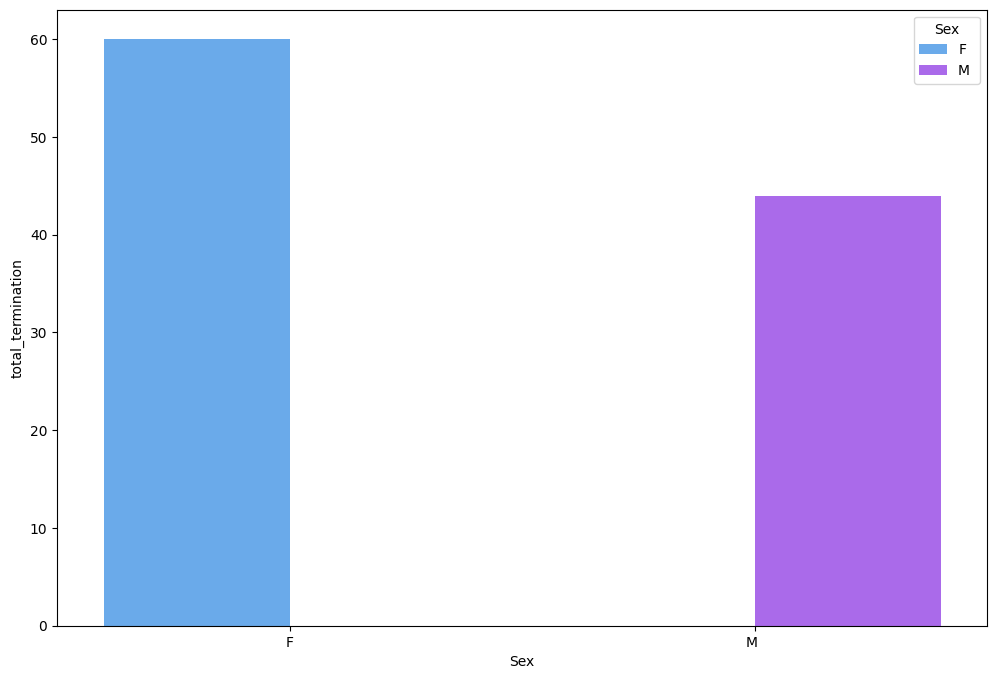

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

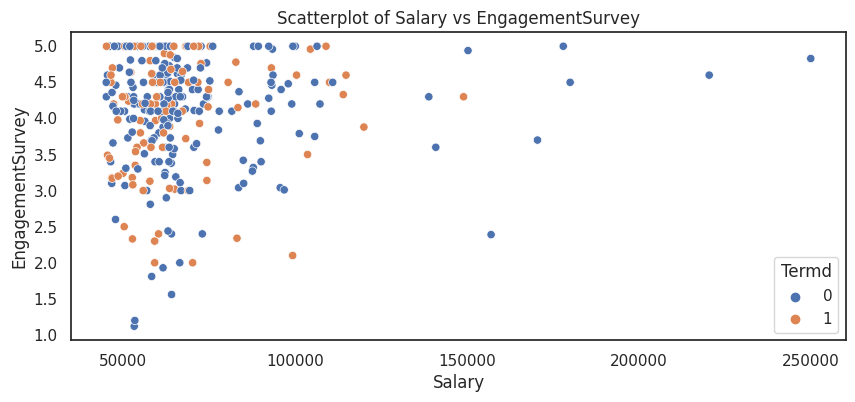

In [ ]:
#code here

sns.set(style="white")
plt.figure(figsize=(10, 4))
sns.scatterplot(x="Salary", y="EngagementSurvey", hue="Termd", data=data)

# menambahkan judul dan label
plt.title("Scatterplot of Salary vs EngagementSurvey")
plt.xlabel("Salary")
plt.ylabel("EngagementSurvey")
# buat legenda
plt.legend(title="Termd")
# tampilkan
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

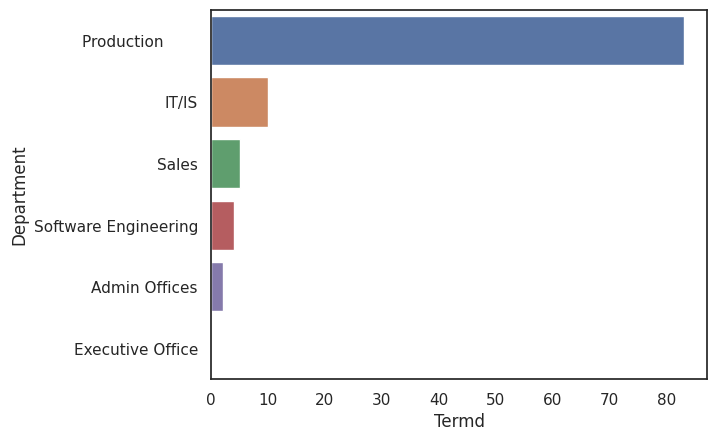

In [ ]:
df = data[data['Termd']==1]
departmen_order = data['Department'].value_counts().index
sns.countplot(data=df, y='Department', order=departmen_order)
plt.xlabel('Termd')
plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

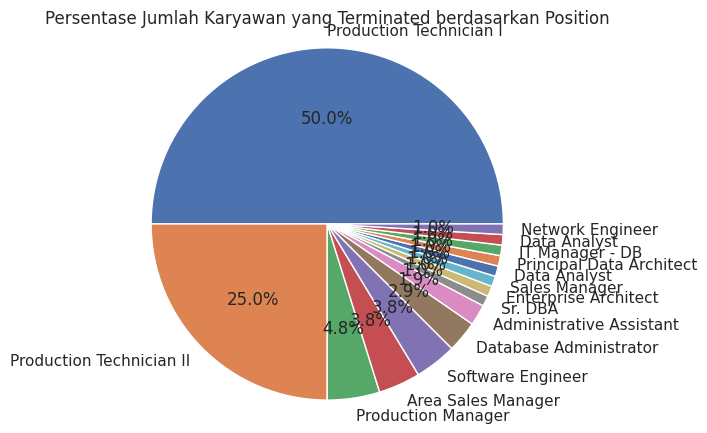

In [ ]:
# Filter data hanya untuk karyawan yang telah "terminated"
terminated_data = data[data['Termd'] == 1]

# Hitung jumlah karyawan yang "terminated" berdasarkan posisi (Position)
terminated_by_position = terminated_data['Position'].value_counts()

# Siapkan data untuk Pie Chart
labels = terminated_by_position.index
sizes = terminated_by_position.values

# Buat Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Persentase Jumlah Karyawan yang Terminated berdasarkan Position')
plt.axis('equal')  # Membuat lingkaran tampak sempurna

# Tampilkan Pie Chart
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

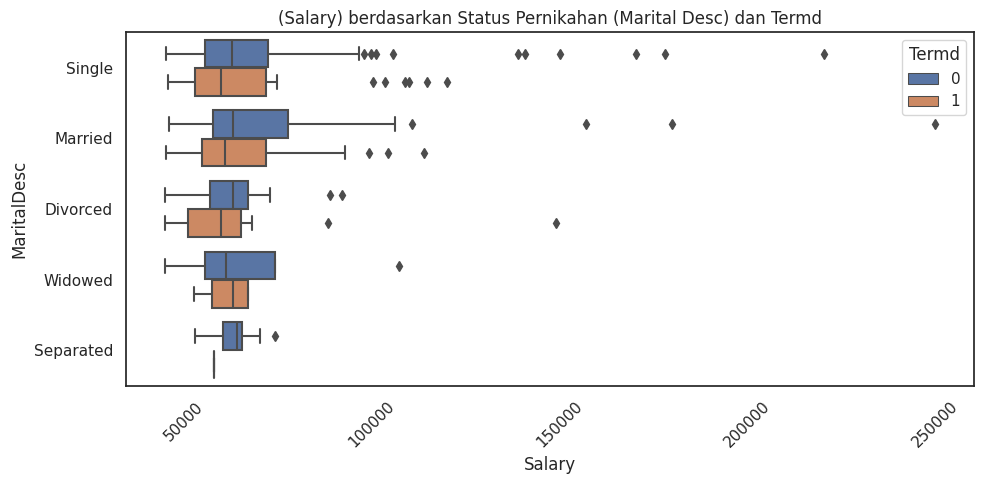

In [ ]:
#code here

# Buat Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Salary', y='MaritalDesc', hue='Termd', data=data)
plt.title('(Salary) berdasarkan Status Pernikahan (Marital Desc) dan Termd')
plt.xlabel('Salary')
plt.ylabel('MaritalDesc')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Tampilkan Boxplot
# plt.legend(title='Terminated', loc='upper right', labels=['Not Terminated', 'Terminated'])
plt.tight_layout()
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


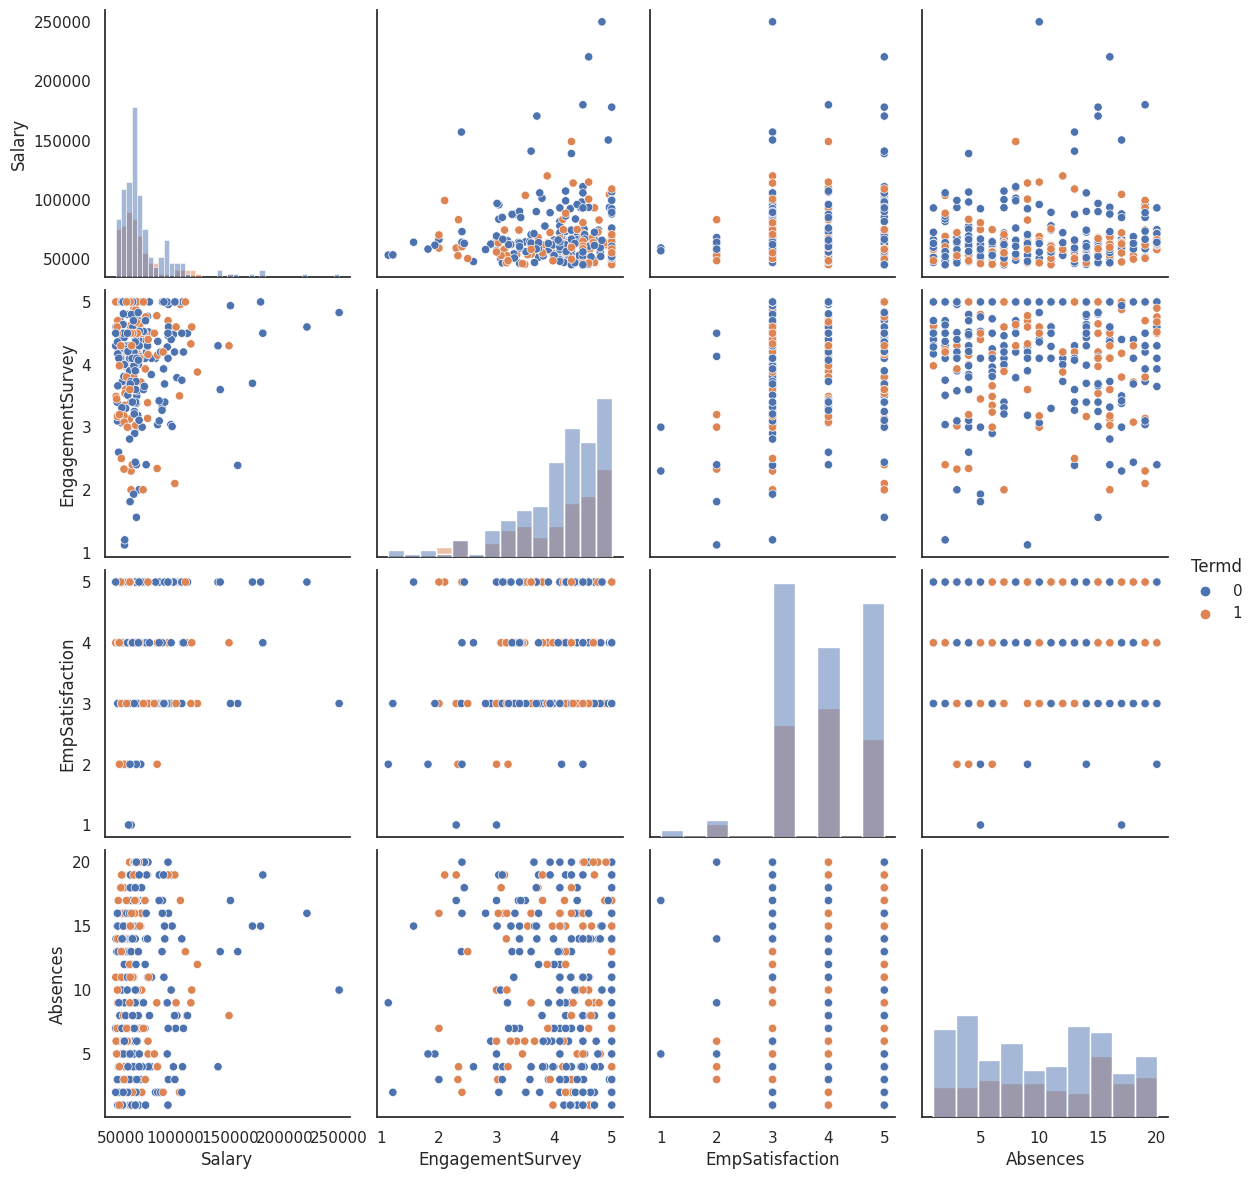

In [ ]:
#codde here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [ ]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)

data['DOB_date'] = pd.to_datetime(data['DOB'])
data['Age'] = 2022 - data['DOB_date'].dt.year
data[['DOB', 'DOB_date', 'Age']]

,DOB,DOB_date,Age
0,07/10/83,1983-07-10,39
1,05/05/75,1975-05-05,47
2,09/19/88,1988-09-19,34
3,09/27/88,1988-09-27,34
4,09/08/89,1989-09-08,33
...,...,...,...
306,05/11/85,1985-05-11,37
307,05/04/82,1982-05-04,40
308,08/30/79,1979-08-30,43
309,02/24/79,1979-02-24,43


In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data['Salary_minmax'] = scaler.fit_transform(data[['Salary']])
data[['Salary', 'Salary_minmax']]


,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [ ]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point

data.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                            object
DateofTerm

In [ ]:
#Setelah diubah category

for kolom in data.columns:
    if data[kolom].dtype == 'object':
        data[kolom] = data[kolom].astype('category')

# cek hasil
print(data.dtypes)

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
from sklearn.preprocessing import LabelEncoder
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point

label_encoder = LabelEncoder()

# Gunakan LabelEncoder untuk mengubah "RecruitmentSource" menjadi numerik
data['RecruitmentSource'] = label_encoder.fit_transform(data['RecruitmentSource'])

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point

data['PerformanceScore'] = label_encoder.fit_transform(data['PerformanceScore'])
data.dtypes

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)
y = data['Termd']

#Independent Variable (feature)
x = data[['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID',
                            'PositionID', 'Age', 'RecruitmentSource', 'PerformanceScore',
                            'Salary_minmax', 'Absences', 'SpecialProjectsCount',
                            'EmpSatisfaction', 'EngagementSurvey']]

In [ ]:
print('Dependent Variabel:')
y.head()

Dependent Variabel:


0    0
1    1
2    1
3    0
4    1
Name: Termd, dtype: int64

In [ ]:
print('Independent Variabel:')
x.head()

Independent Variabel:


,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,39,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,47,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,34,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,34,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,33,3,1,0.028197,2,0,4,5.00


In [ ]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

# Membagi dataset menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Menampilkan jumlah data pada setiap subset
print("Jumlah data pada x_train:", len(x_train))
print("Jumlah data pada y_train:", len(y_train))
print("Jumlah data pada x_test:", len(x_test))
print("Jumlah data pada y_test:", len(y_test))

Jumlah data pada x_train: 248
Jumlah data pada y_train: 248
Jumlah data pada x_test: 63
Jumlah data pada y_test: 63


In [ ]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
# lakukan scaling
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(scaled_x_train, y_train)

LogisticRegression()

In [ ]:
#  hasil prediksi dengan menggunakan fungsi predict
model.predict(scaled_x_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
y_pred = model.predict(scaled_x_test)
accuracy_score(y_test, y_pred)

0.6825396825396826

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display classification report
classification_rep = classification_report(y_test, y_pred)


print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", classification_rep)

Precision: 0.5714285714285714
Recall: 0.36363636363636365

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.78        41
           1       0.57      0.36      0.44        22

    accuracy                           0.68        63
   macro avg       0.64      0.61      0.61        63
weighted avg       0.66      0.68      0.66        63



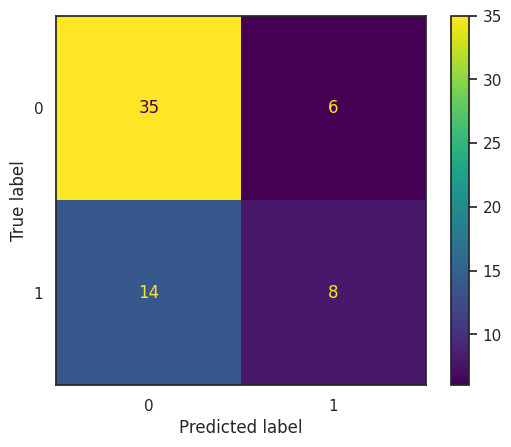

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

In [ ]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DOB_date,Age,Salary_minmax
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,5,0,4.60,5,0,1/17/2019,0,1,1983-07-10,39,0.085190
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,4,1,4.96,3,6,2/24/2016,0,17,1975-05-05,47,0.289777
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,5,1,3.02,3,0,5/15/2012,0,3,1988-09-19,34,0.097139
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,4,1,4.84,5,0,1/3/2019,0,15,1988-09-27,34,0.097315
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,3,1,5.00,4,0,2/1/2016,0,2,1989-09-08,33,0.028197


In [ ]:
manager_performance = data.groupby('ManagerName')['PerfScoreID'].mean().sort_values()

# Tampilkan hasilnya
manager_performance

ManagerName
Debra Houlihan        2.666667
John Smith            2.714286
Brannon Miller        2.818182
Peter Monroe          2.857143
Michael Albert        2.863636
Amy Dunn              2.904762
Kissy Sullivan        2.954545
Webster Butler        3.000000
Board of Directors    3.000000
Brandon R. LeBlanc    3.000000
Brian Champaigne      3.000000
David Stanley         3.000000
Elijiah Gray          3.000000
Lynn Daneault         3.000000
Ketsia Liebig         3.047619
Kelley Spirea         3.090909
Janet King            3.105263
Alex Sweetwater       3.111111
Simon Roup            3.117647
Jennifer Zamora       3.142857
Eric Dougall          3.250000
Name: PerfScoreID, dtype: float64

19. hasil tersebut menunjukkan bahwa hubungan yang tidak terlalu signifikan dalam nilai kinerja antara manajer-manajer tertentu sehingga dapat menjadi indikasi adanya pengaruh manajer terhadap kinerja karyawan.

In [ ]:
# Kelompokkan data berdasarkan sumber rekrutmen dan hitung rasio pemutusan hubungan kerja
recruitment_termination_ratio = data.groupby('RecruitmentSource')['Termd'].mean().sort_values()

# Tampilkan hasilnya
recruitment_termination_ratio

RecruitmentSource
8    0.076923
2    0.161290
5    0.236842
4    0.241379
0    0.478261
7    0.500000
1    0.551724
3    0.612245
6    1.000000
Name: Termd, dtype: float64

20. Hasil analisis ini akan memberikan informasi mengenai sumber rekrutmen  yang cenderung memiliki tingkat rasio hubungan yang rendah. Sumber rekrutmen berbiaya rendah dapat dianggap sebagai sumber rekrutmen terbaik untuk memastikan pengurangan karyawan yang rendah.